<a href="https://www.kaggle.com/code/muhammadglennyunifer/car-price-prediction?scriptVersionId=176650418" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Data Dictionary

1. Car_ID : Unique id of each observation (Interger)
2. Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
3. carCompany : Name of car company (Categorical)
4. fueltype : Car fuel type i.e gas or diesel (Categorical)
5. aspiration : Aspiration used in a car (Categorical)
6. doornumber : Number of doors in a car (Categorical)
7. carbody : body of car (Categorical)
8. drivewheel : type of drive wheel (Categorical)
9. enginelocation : Location of car engine (Categorical)
10. wheelbase : Weelbase of car (Numeric)
11. carlength : Length of car (Numeric)
12. carwidth : Width of car (Numeric)
13. carheight : height of car (Numeric)
14. curbweight : he weight of a car without occupants or baggage. (Numeric)
15. enginetype : Type of engine. (Categorical)
16. cylindernumber : cylinder placed in the car (Categorical)
17. enginesize : Size of car (Numeric)
18. fuelsystem : Fuel system of car (Categorical)
19. boreratio : Boreratio of car (Numeric)
20. stroke : Stroke or volume inside the engine (Numeric)
21. compressionratio : compression ratio of car (Numeric)
22. horsepower : Horsepower (Numeric)
23. peakrpm : car peak rpm (Numeric)
24. citympg : Mileage in city (Numeric)
25. highwaympg : Mileage on highway (Numeric)
26. price(Dependent variable) : Price of car (Numeric)

# Libraries

In [1]:
# Import Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='rainbow')

# Explore Data

In [2]:
# Dataset

print("Car Dataset")
print("")

car = pd.read_excel('/kaggle/input/car-price/CarPrice_Assignment.xlsx',
                   sheet_name = 'CarPrice_Assignment')

car.head(10)

Car Dataset



,car_ID,symboling,manufacturer,type,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Alfa-Romero,Giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,Alfa-Romero,Stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,Alfa-Romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,Audi,100 Ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,Audi,100Ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,Audi,Fox,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,Audi,100Ls,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,Audi,5000,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,Audi,4000,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,Audi,5000S (Diesel),gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
# Dataset dimension, nulls, datatypes

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   manufacturer      205 non-null    object 
 3   type              205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

Key Notes:

1. There are 205 rows/entries and 26 columns/fields
2. All variables have 205 non-null values (no missing values in the dataset)
3. It has 12 numerical variables and 11 categorical variables

In [4]:
# Check Missing Values

print("Number of Missing Values")
print("")

print(pd.isnull(car).sum().sum())

Number of Missing Values

0


In [5]:
# Check Duplicated values

print("Number of Duplicated Values")
print("")

print(car.duplicated().sum())

Number of Duplicated Values

0


# Cleaning Data

**1. Remove unnecessary columns/fields**

In [6]:
del car["car_ID"]
del car["type"]

**2. Make a list of categorical and numerical columns/fields**

In [7]:
category = car.select_dtypes(['object','category']).columns

print("categorical variables")
print("")
print(category)
print("")

numerical = car.select_dtypes('number').columns

print("numerical variables")
print("")
print(numerical)

categorical variables

Index(['manufacturer', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

numerical variables

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


**3. Check unique value of categorical fields**

In [8]:
for p in category:
    print('{var} unique values'.format(var=p))
    print("")
    print(car[p].unique())
    print("");

manufacturer unique values

['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Maxda' 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot'
 'Plymouth' 'Porsche' 'Porcshce' 'Renault' 'Saab' 'Subaru' 'Toyota'
 'Toyouta' 'Vokswagen' 'Volkswagen' 'Vw' 'Volvo']

fueltype unique values

['gas' 'diesel']

aspiration unique values

['std' 'turbo']

doornumber unique values

['two' 'four']

carbody unique values

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel unique values

['rwd' 'fwd' '4wd']

enginelocation unique values

['front' 'rear']

enginetype unique values

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber unique values

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem unique values

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



**4. Rename "symboling" field and change their values**

In [9]:
car.rename(columns={"symboling":"riskrating"}, inplace=True)

car["riskrating"] = car["riskrating"].apply(str)

car.riskrating = np.where(car.riskrating == "-2", "Very Safety Car",car.riskrating)
car.riskrating = np.where(car.riskrating == "-1", "Safety Car",car.riskrating)
car.riskrating = np.where(car.riskrating == "0","Normal Car",car.riskrating)
car.riskrating = np.where(car.riskrating == "1","Risky Car",car.riskrating)
car.riskrating = np.where(car.riskrating == "2","Very Risky Car",car.riskrating)
car.riskrating = np.where(car.riskrating == "3","Much more Risky Car",car.riskrating)

print("New riskrating values")
print("")
print(car['riskrating'].unique())

New riskrating values

['Much more Risky Car' 'Risky Car' 'Very Risky Car' 'Normal Car'
 'Safety Car' 'Very Safety Car']


**5. Change the values of "doornumber" field**

In [10]:
car.doornumber = np.where(car.doornumber == "two","2 doors",car.doornumber)
car.doornumber = np.where(car.doornumber == "four","4 doors",car.doornumber)

print("New doornumber values")
print("")
print(car['doornumber'].unique())

New doornumber values

['2 doors' '4 doors']


**6. Change the values of "cylindernumber" field**

In [11]:
car.cylindernumber = np.where(car.cylindernumber == "four","2 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "six","6 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "five","5 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "three","3 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "twelve","12 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "two","2 cyl",car.cylindernumber)
car.cylindernumber = np.where(car.cylindernumber == "eight","8 cyl",car.cylindernumber)


print("New cylindernumber values")
print("")
print(car['cylindernumber'].unique())

New cylindernumber values

['2 cyl' '6 cyl' '5 cyl' '3 cyl' '12 cyl' '8 cyl']


**7. Change any similar values on manufacturer field**

In [12]:
car['manufacturer'].mask(car['manufacturer'] == 'Maxda', "Mazda", inplace=True)
car['manufacturer'].mask(car['manufacturer'] == 'Porcshce', "Porsche", inplace=True)
car['manufacturer'].mask(car['manufacturer'] == 'Toyouta', "Toyota", inplace=True)
car['manufacturer'].mask(car['manufacturer'] == 'Vokswagen', "Volkswagen", inplace=True)
car['manufacturer'].mask(car['manufacturer'] == 'Vw', "Volkswagen", inplace=True)


print("New manufacturer values")
print("")
print(car['manufacturer'].unique())

New manufacturer values

['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'
 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


**8. New Make new list of columns/fields after cleaning data**

In [13]:
category2 = car.select_dtypes(['object','category']).columns

print("New categorical variables after clening data")
print("")
print(category2)
print("")

numerical2 = car.select_dtypes('number').columns

print("New numerical variables after clening data")
print("")
print(numerical2)

New categorical variables after clening data

Index(['riskrating', 'manufacturer', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

New numerical variables after clening data

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


**9. Find outliers for all numerical variables**

In [14]:
for nlro in numerical2:
    print('{var} data description'.format(var=nlro))
    print(round(car[nlro].describe()),2)
    print('')
    IQR = car[nlro].quantile(0.75) - car[nlro].quantile(0.25)
    Lower_fence = car[nlro].quantile(0.25) - (IQR * 1.5)
    Upper_fence = car[nlro].quantile(0.75) + (IQR * 1.5)
    print('{outvar} outliers are values < {lowerboundary} or > {upperboundary}'.format(outvar=nlro,lowerboundary=Lower_fence, upperboundary=Upper_fence))
    print('');

wheelbase data description
count    205.0
mean      99.0
std        6.0
min       87.0
25%       94.0
50%       97.0
75%      102.0
max      121.0
Name: wheelbase, dtype: float64 2

wheelbase outliers are values < 82.64999999999999 or > 114.25000000000001

carlength data description
count    205.0
mean     174.0
std       12.0
min      141.0
25%      166.0
50%      173.0
75%      183.0
max      208.0
Name: carlength, dtype: float64 2

carlength outliers are values < 141.10000000000002 or > 208.29999999999995

carwidth data description
count    205.0
mean      66.0
std        2.0
min       60.0
25%       64.0
50%       66.0
75%       67.0
max       72.0
Name: carwidth, dtype: float64 2

carwidth outliers are values < 59.89999999999998 or > 71.10000000000002

carheight data description
count    205.0
mean      54.0
std        2.0
min       48.0
25%       52.0
50%       54.0
75%       56.0
max       60.0
Name: carheight, dtype: float64 2

carheight outliers are values < 46.75 or > 60.75



Key Notes:

1. There are 3 variables that have lower outliers, because they have values that lower than lower fence:

   stroke, compressionratio, and carlength.
   
   So, we will change the minimum value to the lower fence value.
   
2. There are 10 variables that has upper outliers, because they have values that bigger than upper fence:

   wheelbase, carwidth, enginesize, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, and price.
   
   So, we will change the maximum value to the upper fence value.

**10. Handling Outliers**

In [15]:
# Handling Upper Outliers

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [car]:
    df3['wheelbase'] = max_value(df3, 'wheelbase', 114.25)
    df3['carwidth'] = max_value(df3, 'carwidth', 71.1)
    df3['enginesize'] = max_value(df3, 'enginesize', 207.0)
    df3['stroke'] = max_value(df3, 'stroke', 3.86)
    df3['compressionratio'] = max_value(df3, 'compressionratio', 10.6)
    df3['horsepower'] = max_value(df3, 'horsepower', 185.0)
    df3['peakrpm'] = max_value(df3, 'peakrpm', 6550.0)
    df3['citympg'] = max_value(df3, 'citympg', 46.5)
    df3['highwaympg'] = max_value(df3, 'highwaympg', 47.5)
    df3['price'] = max_value(df3, 'price', 29575.5);

# Handling Lower Outliers

def min_value(df4, variable, down):
    return np.where(df4[variable]<down, down, df4[variable])

for df4 in [car]:
    df4['stroke'] = min_value(df4, 'stroke', 3.0)
    df4['compressionratio'] = min_value(df4, 'compressionratio', 7.0)
    df4['carlength'] = min_value(df4, 'carlength', 142.0);

# EDA & Data Visualization

**1. Data visualization using histogram and boxplot for numerical variables**

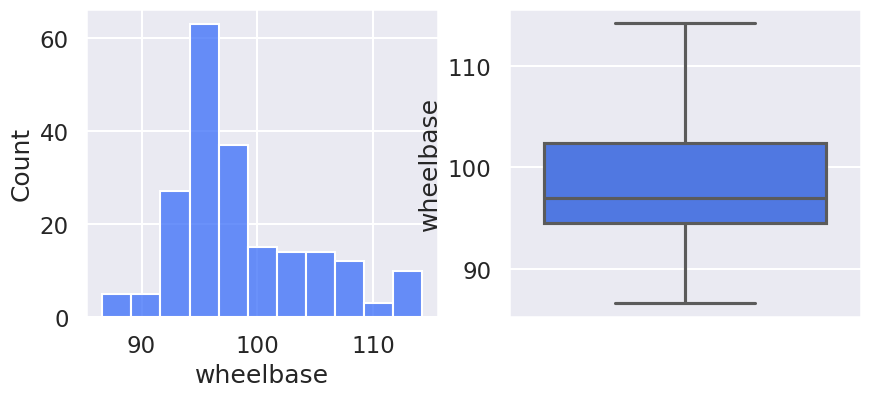

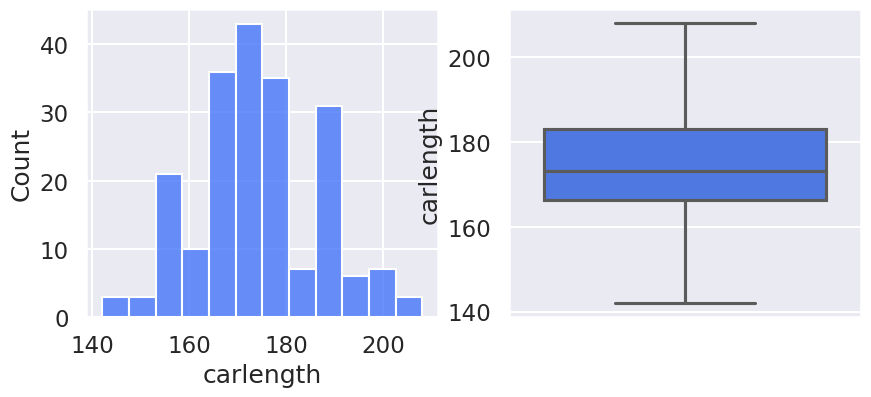

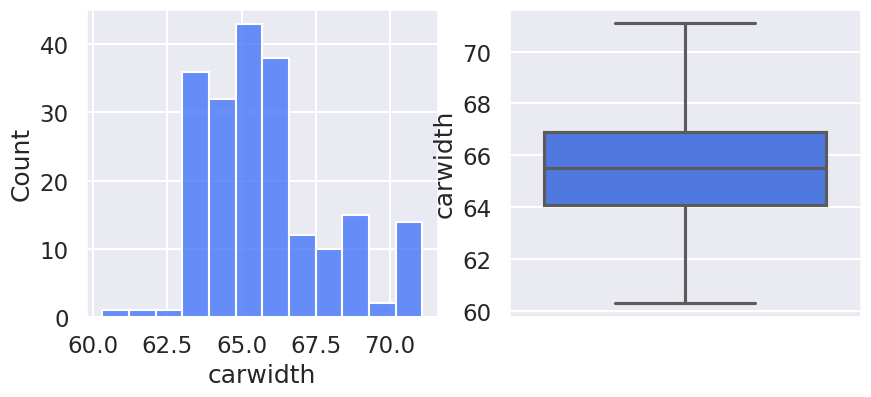

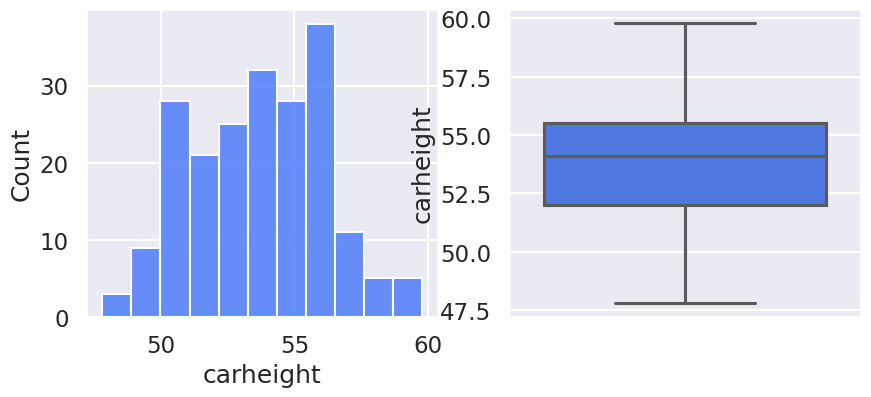

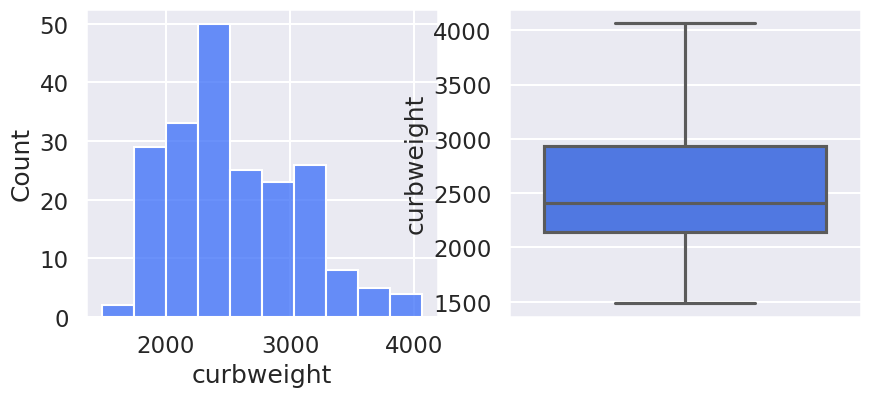

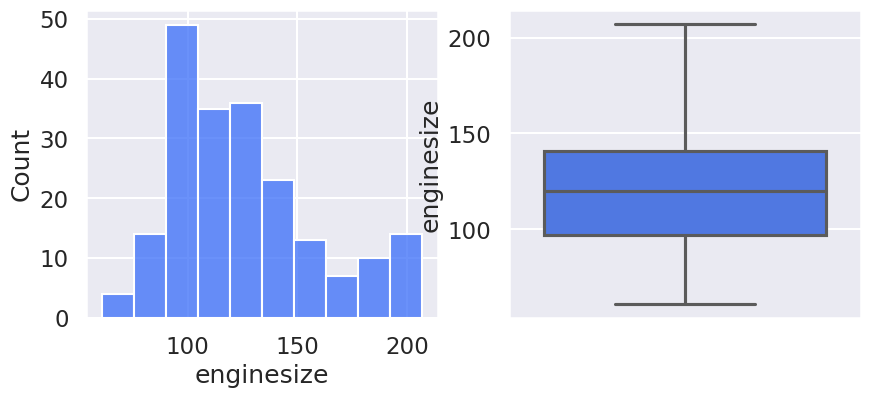

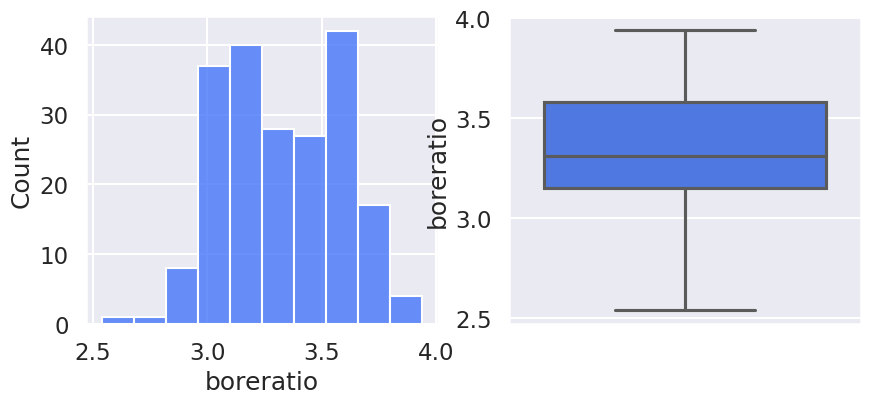

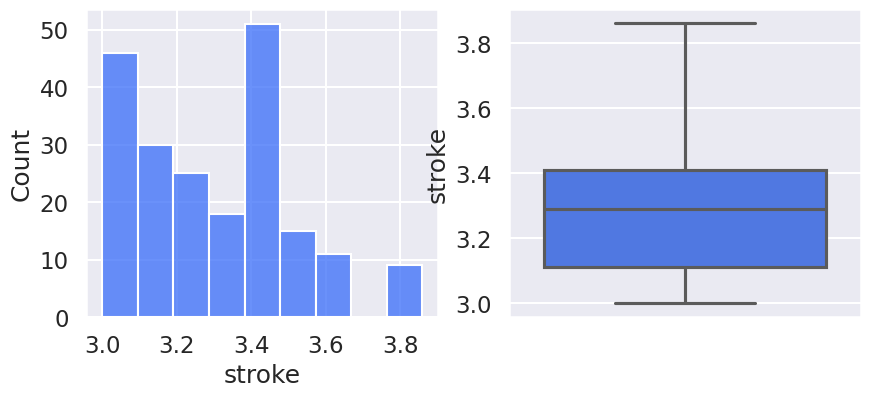

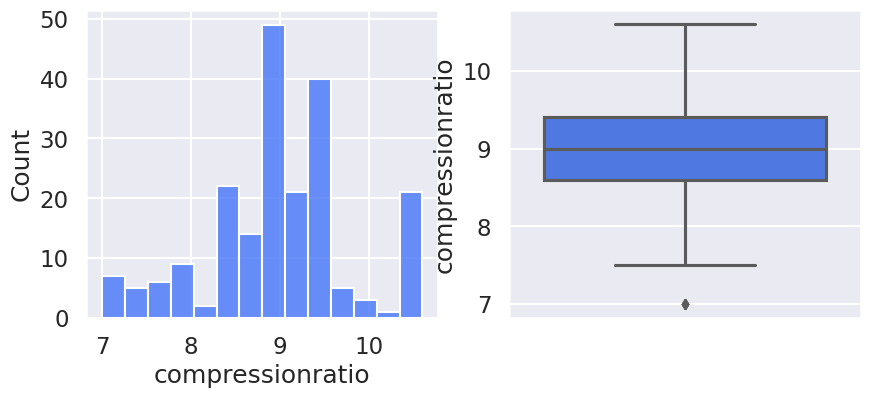

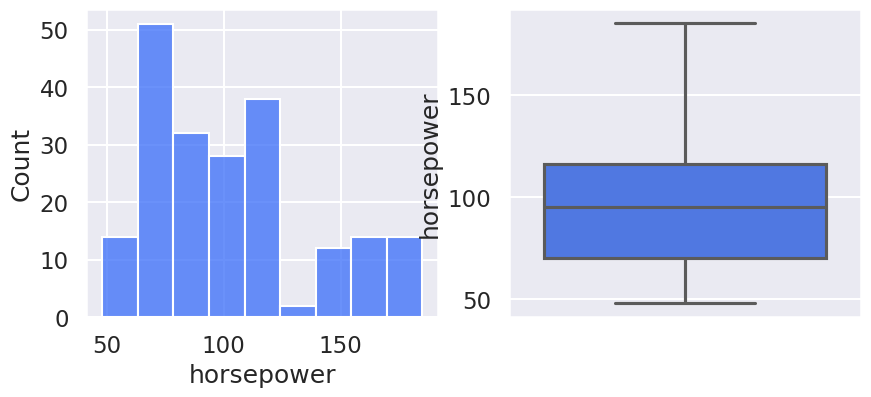

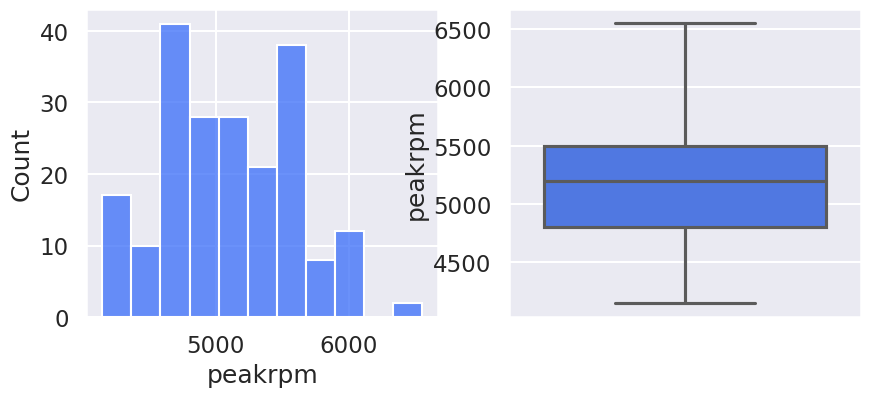

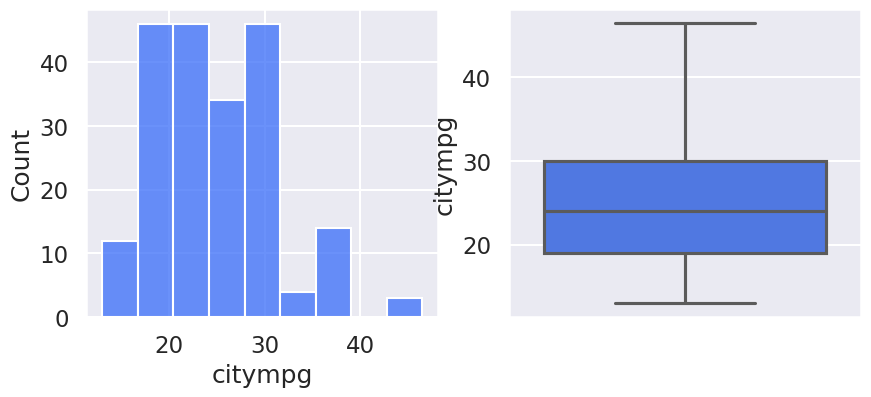

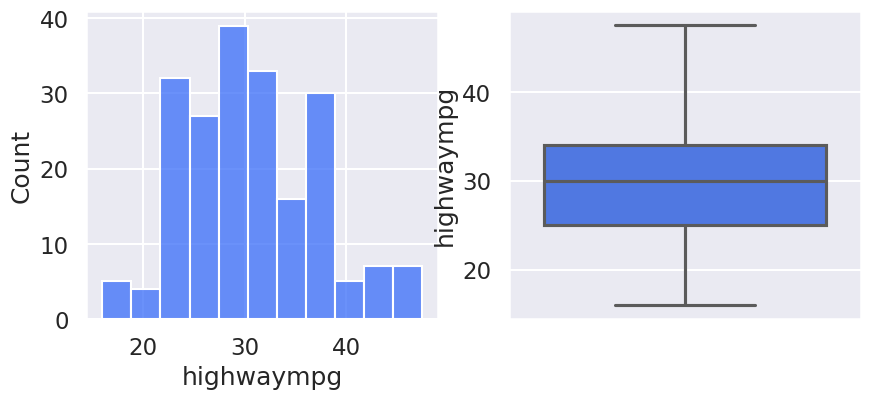

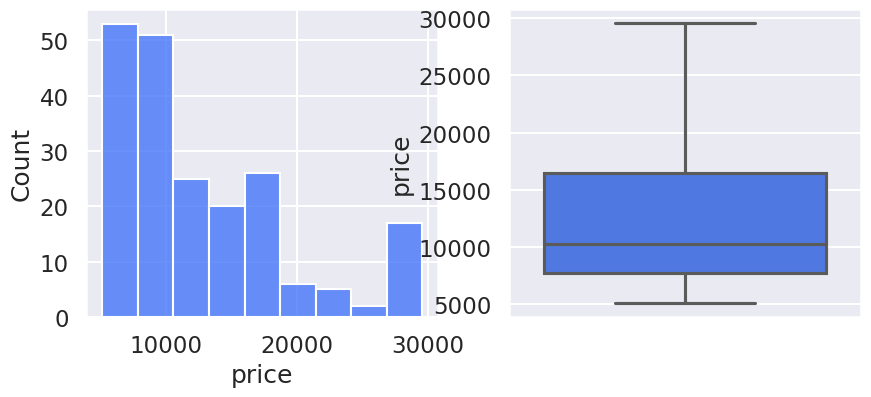

In [16]:
for col in numerical2:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=car, x=col, ax=ax[0])
    sns.boxplot(data=car, y=col, ax=ax[1])
    plt.show();

Key Notes:

1. There are no extreme outliers in all of numerical variables.
2. Wheel base : Majority between 94 - 102
3. Car length : Majority between 166 - 183
4. Car width : Majority between 64 - 67
5. Car height : Majority between 52 - 56
6. Curb weight : Majority between 2145 - 2935
7. Engine size : Majority between 97 - 141
8. Bore Ratio : Majority between 3 - 4
9. Stroke : Majority on 3
10. Compression Ratio : Majority on 9
11. Horse Power : Majority between 70 - 116
12. Peak RPM : Majority between 4800 - 5500
13. City MPG : Majority between 19 - 30
14. Highway MPG : Majority between 25 - 34
15. Price : Majority between 7788 - 16593

**2. Data visualization using countplot for categorical variabless**

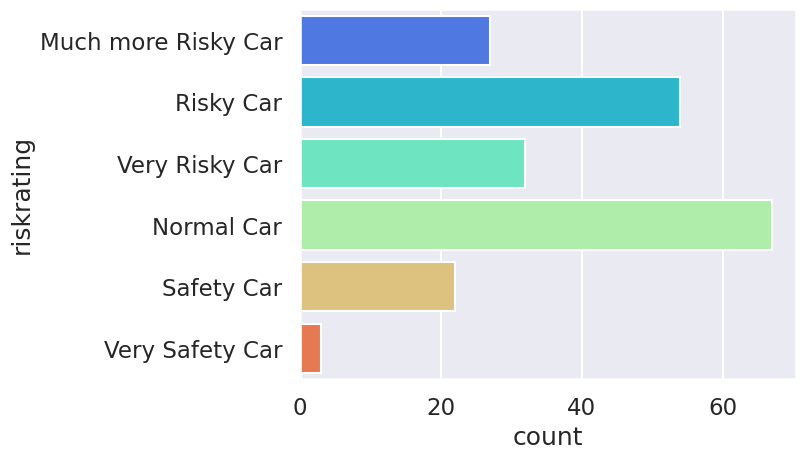

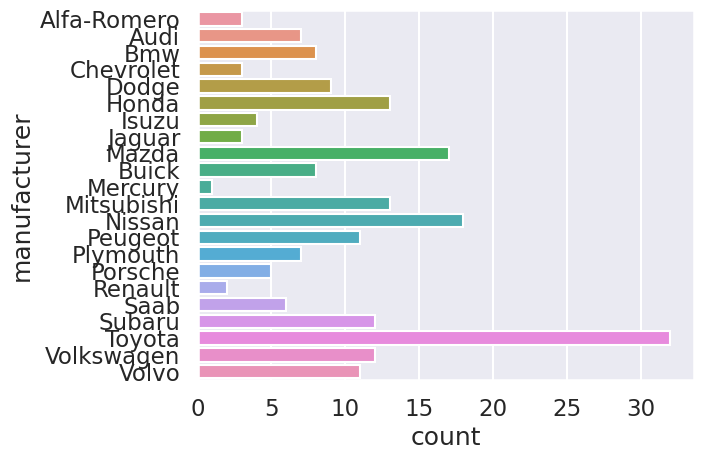

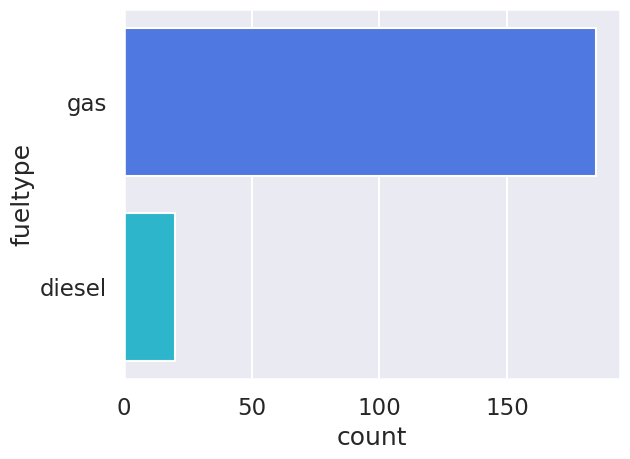

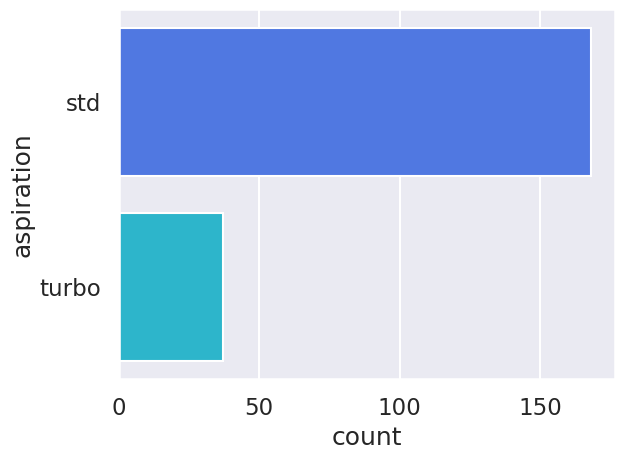

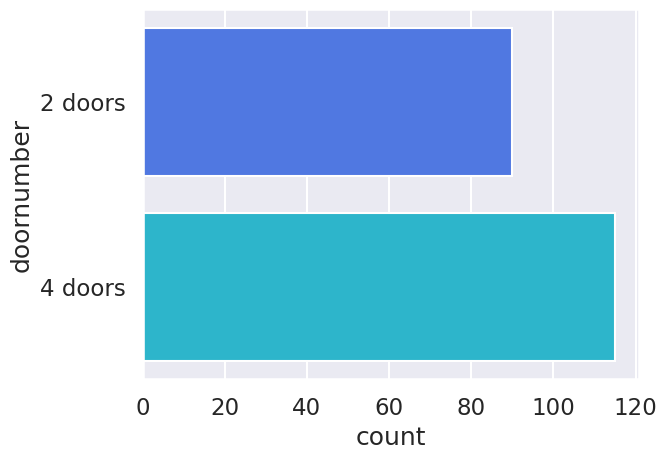

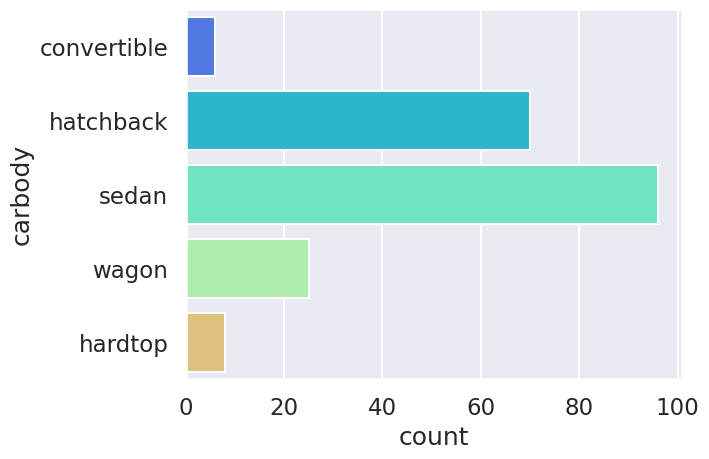

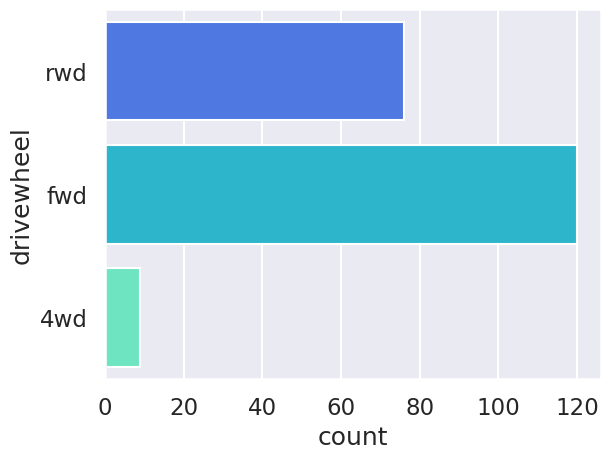

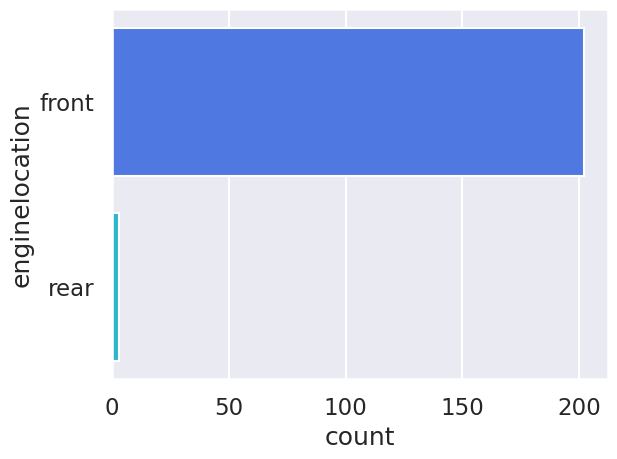

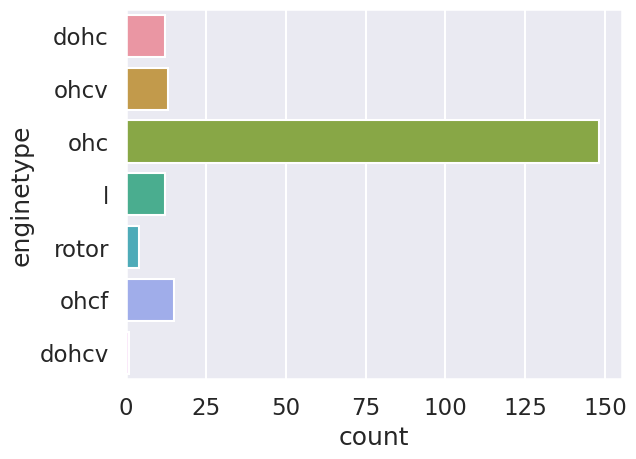

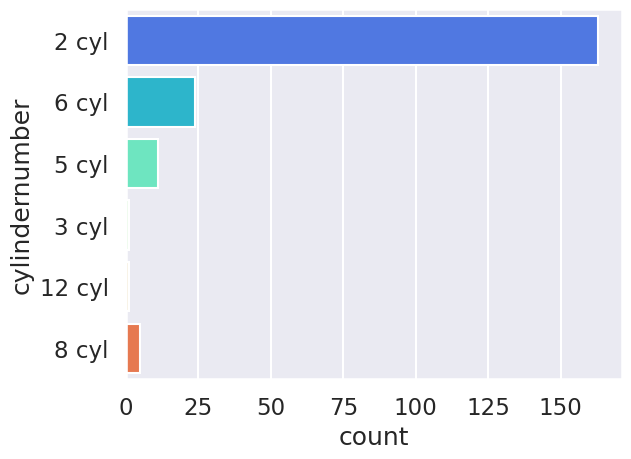

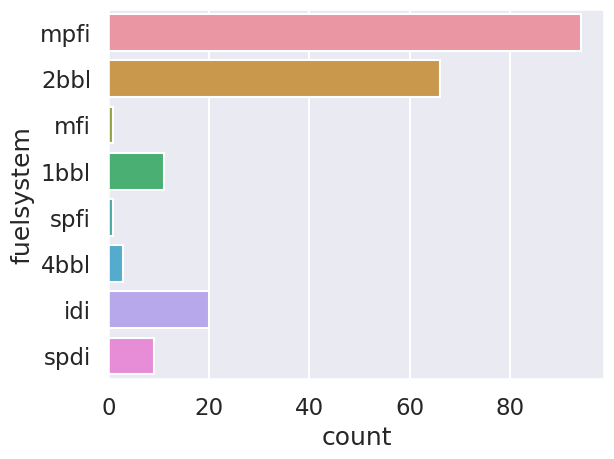

In [17]:
for t in category2:
    sns.countplot(y=car[t])
    plt.show()

Key Notes:

1. Normal car and risky car have more number of car than others. Otherwise, safety and very safety car have the lowest number.
2. Toyota, Nissan, and mazda is the top three of manufacturers based on the number of car units.
3. The number of gasoline car is more than diesel car.
4. The number of standart aspiration car is more than turbo car.
5. The number of car with 4 doors is more than the car with 2 doors.
6. Sedan and hatchback have more number of car than others. Otherwise, convertible and hardtop car have the lowest number.
7. The number of front wheel darive car is more than rear wheel drive car.
8. The number of front engine car is more than rear engine car.
9. ohc car have more number of car than others
10. 2 cyl car have more number of car than others
11. mpfi and 2bbl car have more number of car than others. Otherwise, mfi and spfi car have the lowest number.

**3. Data visualization using boxplot for bivariate analysis (cat-num)**

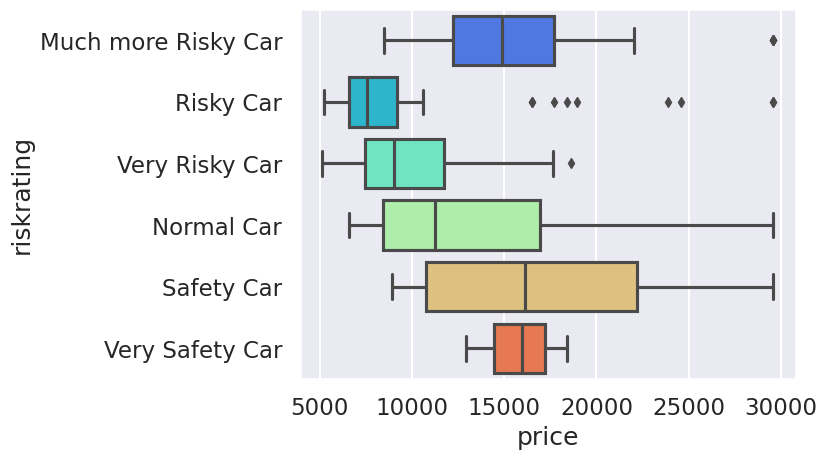

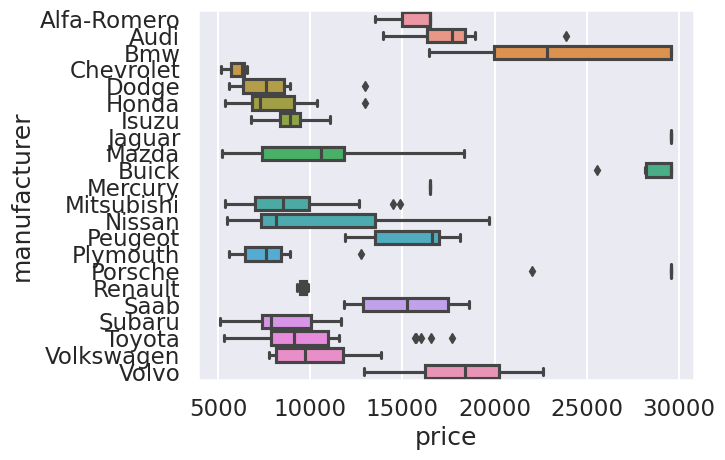

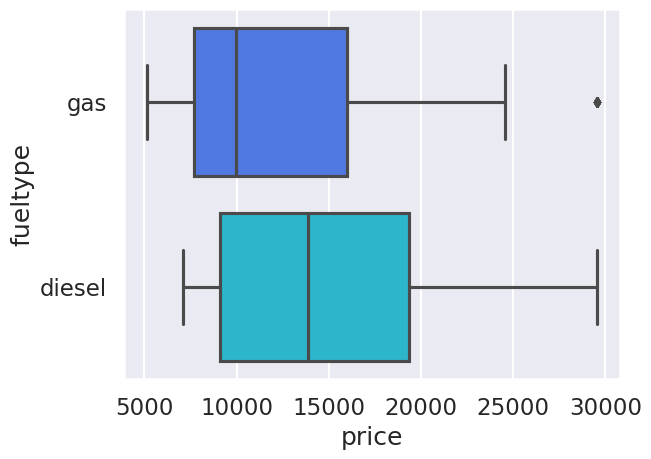

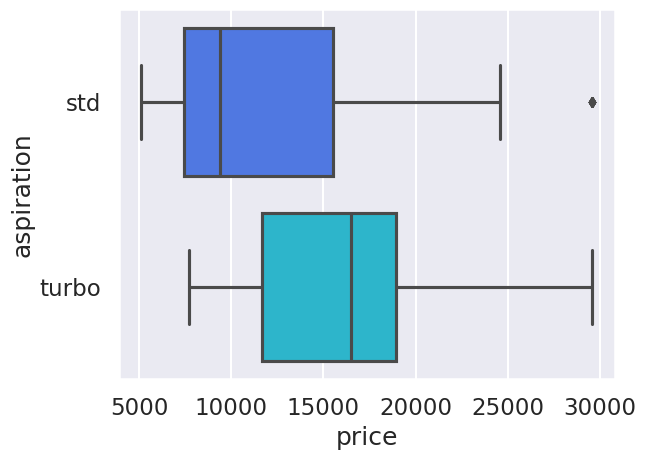

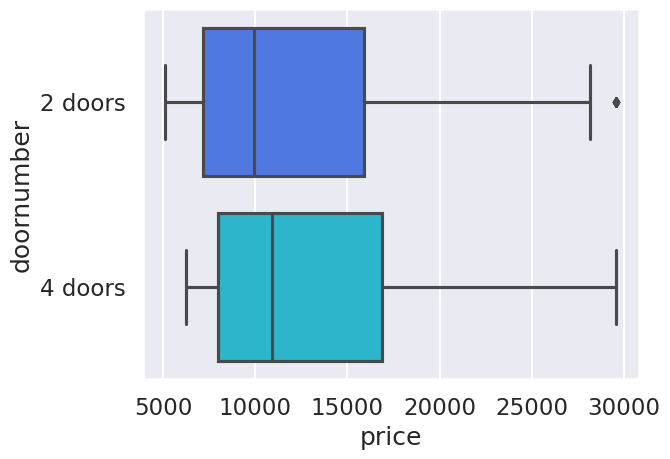

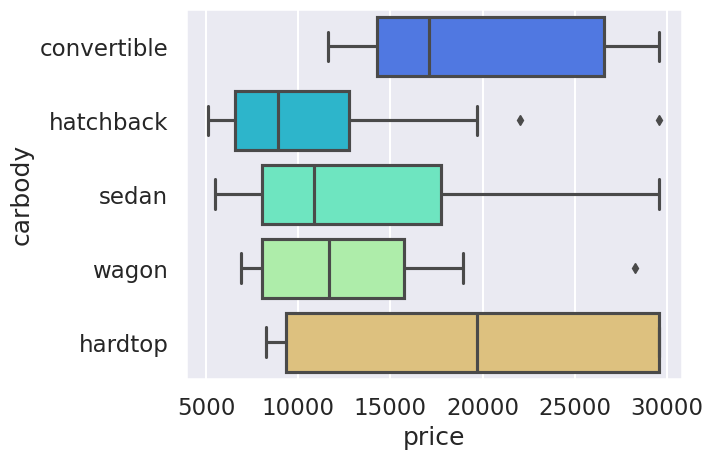

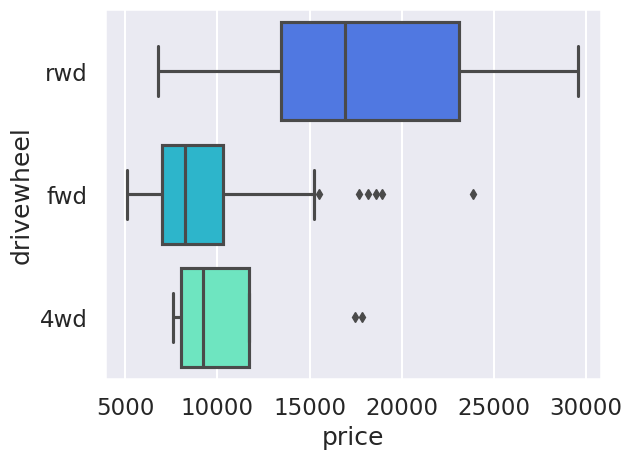

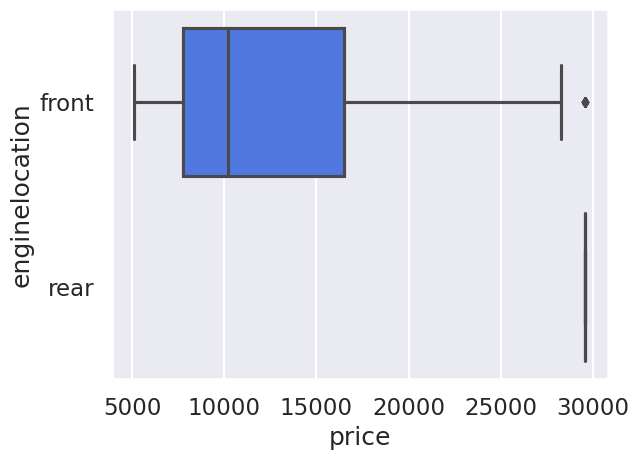

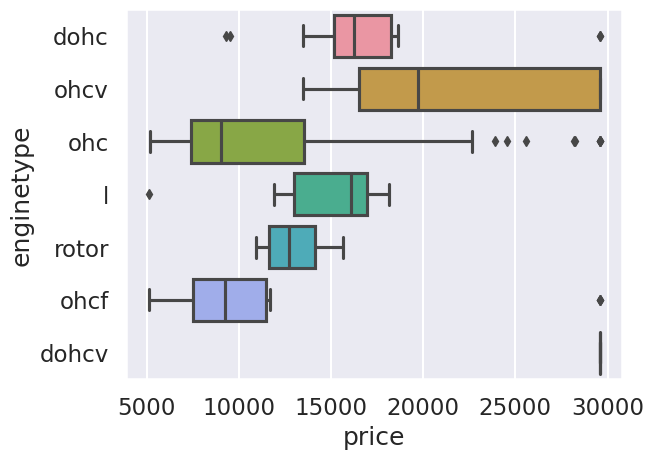

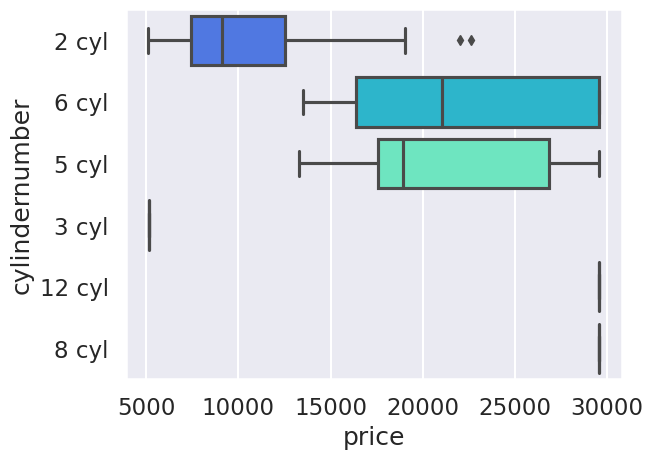

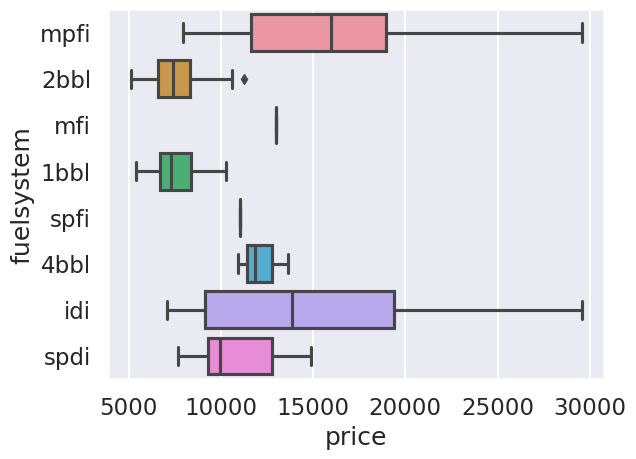

In [18]:
for q in category2:
    sns.boxplot(x="price", y=q, data=car)
    plt.show();

Key Notes:

1. The price of safety car > vry safety car > much more risky car > normal car > very risky car > risky car.
2. Porche, Jaguar, and Buick have the most expensive car.
3. Diesel car is more expensive than gasoline car.
4. Turbo car is more expensive than standard car.
5. 4 door car more expensive than the car with 2 doors.
6. The price of hardtop > convertible > wagon > sedan > hatchback.
7. The price of rear wheel drive > 4 wheel drive > front wheel drive.
8. Rear engine car is more expensive than front engine car.
9. The price of dohcv > ohcv > dohc > l > rotor > ohcf > ohc.
10. 12 cyl and 8 cyl car more expensive than other car with lower number of cylinder.
11. The price of mpfi > idi > mfi > 4bbl > spfi > spdi > lbbl > 2bbl


**4. Correlation visualization using heatmap for bivariate analysis (num-num)**

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874978  0.798179   0.594171    0.775265   
carlength          0.874978   1.000000  0.847701   0.491416    0.877823   
carwidth           0.798179   0.847701  1.000000   0.283227    0.871963   
carheight          0.594171   0.491416  0.283227   1.000000    0.295572   
curbweight         0.775265   0.877823  0.871963   0.295572    1.000000   
enginesize         0.554028   0.701460  0.740015   0.101874    0.866445   
boreratio          0.489113   0.606472  0.562591   0.171071    0.648480   
stroke             0.207757   0.187567  0.238194  -0.050376    0.217582   
compressionratio   0.012393  -0.063550 -0.046449   0.136373   -0.104816   
horsepower         0.398973   0.601508  0.649449  -0.065164    0.777837   
peakrpm           -0.359412  -0.287987 -0.223673  -0.320942   -0.266538   
citympg           -0.469008  -0.670070 -0.649570  -0.046677   -0.759475   
highwaympg        -0.5404

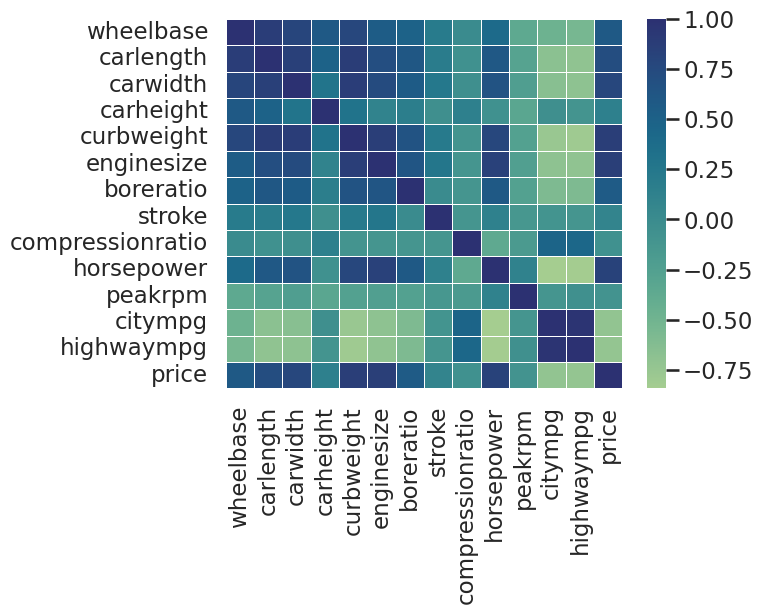

In [19]:
print(car.corr())
sns.heatmap(car.corr(),cmap="crest", linewidths=.5)
plt.show()

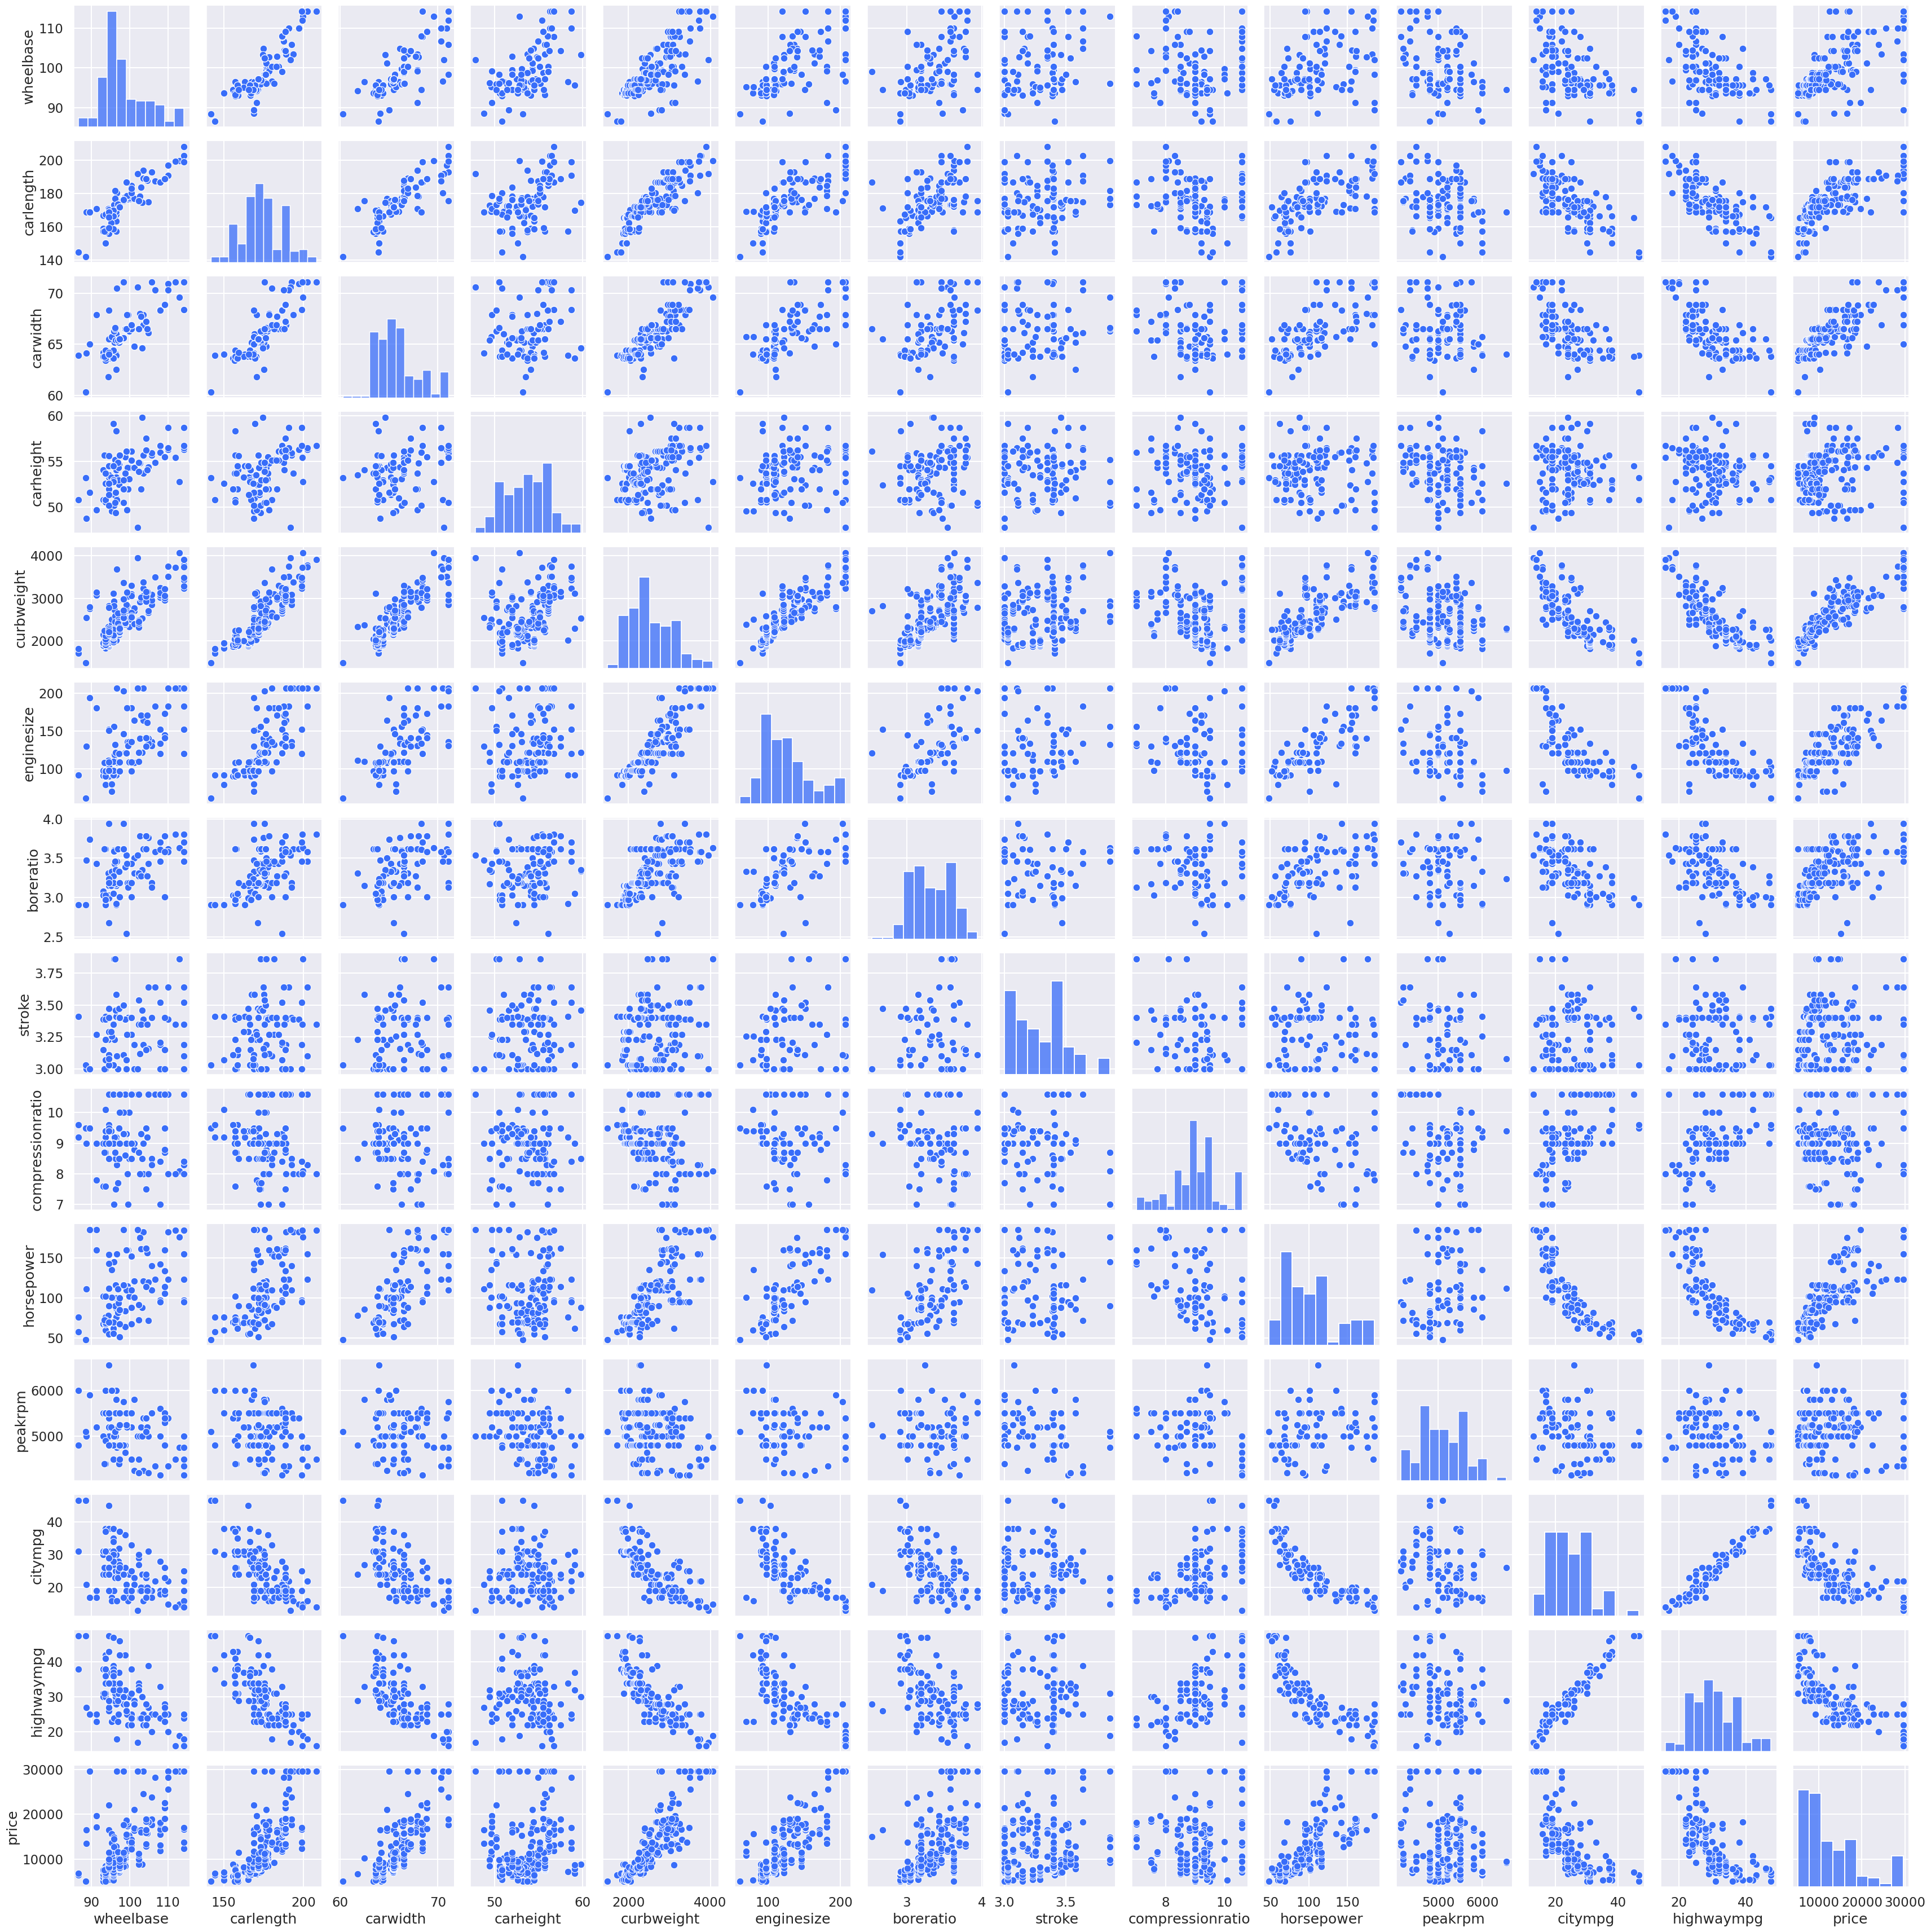

In [20]:
sns.pairplot(car)

Key Notes:

price
* Possitively influenced by : wheelbase, carlength, caarwidth, curbweight, enginesize, boreratio, horsepower, 
* Negatively influenced by : citympg, highwaympg

highwaympg
* Possitive influenced by : citympg
* Negatively influenced by : wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower

horsepower
* Possitive influenced by : curbweight, enginesize
* Negatively influenced by : citympg, highwaympg

**5. Crostabb for bivariate analysis (cat-cat) with 2 variables**

In [21]:
print("Crosstab with 2 variables")
print("")
ct1 = pd.crosstab(car.manufacturer,car.riskrating, margins=True)
ct1

Crosstab with 2 variables



riskrating,Much more Risky Car,Normal Car,Risky Car,Safety Car,Very Risky Car,Very Safety Car,All
manufacturer,,,,,,,
Alfa-Romero,2,0,1,0,0,0,3
Audi,0,1,3,0,3,0,7
Bmw,0,6,1,0,1,0,8
Buick,1,2,1,4,0,0,8
Chevrolet,0,1,1,0,1,0,3
Dodge,1,0,7,1,0,0,9
Honda,0,7,4,0,2,0,13
Isuzu,0,2,1,0,1,0,4
Jaguar,0,3,0,0,0,0,3


Much more risky car
* 11 manufacturer
* The most number of car : Mitsubishi (5) & Porsche (4)

Very risky car
* 12 manufacturer
* The most number of car : Volkswagen (7) & Toyota (6)

Risky car
* 15 manufacturer
* The most number of car : Nissan (10), Mazda (7), Dodge (7), Toyota (7)

Normal car
* 14 Manufacturer
* The most number of car : Peugeot (11), Toyota (10)

Safety car
* 6 Manufacturer
* The most number of car : Volvo (8), Toyota (7)

Very safety car
* 1 Manufacturer
* The most number of car : Volvo (3)

**6. Crostabb 2 for bivariate analysis with 3 variables (cat-cat)**

In [22]:
print("Crosstab with 3 variables")
print("")
ct2 = pd.crosstab(index= car["riskrating"],
                  columns= [car["carbody"], 
                            car["aspiration"]],
                  margins=True)
ct2

Crosstab with 3 variables



carbody             convertible hardtop       hatchback       sedan        \
aspiration                  std     std turbo       std turbo   std turbo   
riskrating                                                                  
Much more Risky Car           5       2     0        12     8     0     0   
Normal Car                    0       0     1         7     1    37     6   
Risky Car                     0       1     0        23     4    20     3   
Safety Car                    0       0     0         2     0     7     6   
Very Risky Car                1       4     0        13     0    12     2   
Very Safety Car               0       0     0         0     0     2     1   
All                           6       7     1        57    13    78    18   

carbody             wagon        All  
aspiration            std turbo       
riskrating                            
Much more Risky Car     0     0   27  
Normal Car             12     3   67  
Risky Car               3     0   54  
Safety Car              5     2   22  
Very Risky Car          0     0   32  
Very Safety Car         0     0    3  
All                    20     5  205

The most number of car
1. sedan std 
2. hatchback std
3. wagon std
4. sedan turbo
5. hatchback turbo

* The most number of Much more risky car : hatchback std and turbo

* The most number of Very risky car : hatchback std and sedan std

* The most number of Risky car : hatchback std and sedan std

* The most number of Normal car : sedan std and wagon std

* The most number of Safety car : sedan std and sedan turbo

* The most number of Very safety car : sedan std and sedar turbo


**7. Heatmap between categorical variables**

<AxesSubplot:xlabel='drivewheel', ylabel='carbody'>

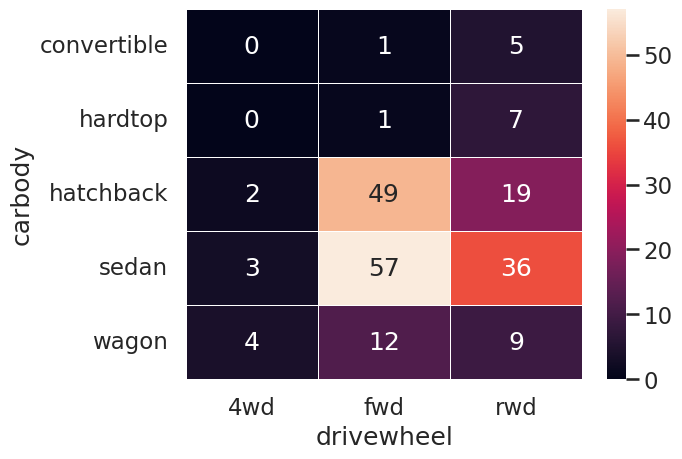

In [23]:
hmc = sns.heatmap(pd.crosstab(car.carbody,car.drivewheel), annot=True, fmt=".0f", linewidths=.5)
hmc

The most number of car based on drivewheel:

1. sedan fwd
2. hatchback fwd
3. sedan rwd
4. hatchback rwd
5. wagon fwd
6. wagon rwd
7. hardtop rwd
8. convertible rwd
9. wagon 4wd
10. sedan 4wd
11. hatchback 4wd
12. hardtop and convertible fwd

**8. Grouping Variables (Pivot Table)**

In [24]:
car_risk = car[["riskrating",'wheelbase', 'carlength', 'carwidth','curbweight',
       'enginesize', 'horsepower','citympg', 'highwaympg', 'price']]

pivot2 = pd.DataFrame(car_risk.groupby(['riskrating']).mean())

pivot2

pivot2.sort_values(by = ["price"], axis = 0, ascending=False) # Sort by price

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
riskrating,,,,,,,,,
Safety Car,105.945455,185.118182,67.677273,2961.227273,145.136364,117.590909,22.772727,27.272727,17029.181818
Much more Risky Car,94.992593,173.137037,66.148148,2717.518519,140.259259,135.888889,19.333333,25.333333,16468.037037
Very Safety Car,104.300000,188.800000,67.200000,2964.000000,137.333333,130.000000,21.333333,26.000000,15781.666667
Normal Car,101.020149,178.444776,66.226866,2708.641791,129.776119,101.313433,24.791045,30.029851,13670.151746
Very Risky Car,96.237500,169.162500,65.093750,2334.250000,113.656250,90.031250,27.843750,33.781250,10109.281250
Risky Car,95.912963,166.635185,64.992593,2227.851852,107.648148,88.296296,28.296296,33.972222,9711.064815


wheelbase
* top -> Safety car
* low -> risky car

carlength
* top -> Very Safety Car
* low -> Very Risky Car

carwidth
* top -> Safety Car
* low -> Risky Car

curbweight
* top -> Very Safety Car
* low -> Risky Car

enginesize
* top -> Safety Car
* low -> Risky Car

horsepower
* top -> Much more Risky Car
* low -> Risky Car

citympg
* top -> Risky Car
* low -> Much more Risky Car

highwaympg
* top -> Risky Car
* low -> Much more Risky Car

**9. The characteristics of 3 favourable cars**

In [25]:
# Filtering rows

condition1 = car["carbody"] == "sedan"
condition2 = car["carbody"] == "hatchback"
condition3 = car["carbody"] == "wagon"
car_3body = car[condition1 | condition2 | condition3]
car_3body

# Select several columns

car_3body = car_3body[["carbody","manufacturer",'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']]
car_3body

# Pivot table from filtered data

pivot1 = pd.DataFrame(car_3body.groupby(['carbody','manufacturer']).mean())

# Remove the multi-index 

pivot1 = pivot1.reset_index() 
pivot1.columns.name = None

# Pivot Table

print("Pivot table from filtered data")
print("")
pivot1
pivot1.sort_values(by = ["carbody","price"], axis = 0, ascending=[True,False])

Pivot table from filtered data



,carbody,manufacturer,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
11,hatchback,Porsche,96.450000,172.300000,69.700000,50.350000,3072.000000,177.000000,3.940000,3.110000,9.750000,164.000000,5625.000000,18.000000,27.500000,25796.750000
1,hatchback,Audi,99.500000,178.200000,67.900000,52.000000,3053.000000,131.000000,3.130000,3.400000,7.000000,160.000000,5500.000000,16.000000,22.000000,17859.167000
7,hatchback,Mercury,102.700000,178.400000,68.000000,54.800000,2910.000000,140.000000,3.780000,3.120000,8.000000,175.000000,5000.000000,19.000000,24.000000,16503.000000
0,hatchback,Alfa-Romero,94.500000,171.200000,65.500000,52.400000,2823.000000,152.000000,2.680000,3.470000,9.000000,154.000000,5000.000000,19.000000,26.000000,16500.000000
13,hatchback,Saab,99.100000,186.600000,66.500000,56.100000,2724.333333,121.000000,3.206667,3.046667,9.203333,126.666667,5333.333333,20.333333,27.333333,15013.333333
9,hatchback,Nissan,94.700000,171.780000,66.540000,51.420000,2740.200000,152.000000,3.354000,3.314000,8.740000,134.200000,5200.000000,22.600000,28.800000,14409.000000
5,hatchback,Isuzu,96.000000,172.600000,65.200000,51.400000,2734.000000,119.000000,3.430000,3.230000,9.200000,90.000000,5000.000000,24.000000,29.000000,11048.000000
6,hatchback,Mazda,95.690000,168.670000,65.490000,52.360000,2253.500000,92.900000,3.258000,3.264000,9.040000,89.400000,5340.000000,23.700000,29.500000,10085.000000
16,hatchback,Volkswagen,94.500000,165.700000,64.000000,51.400000,2221.000000,109.000000,3.190000,3.400000,8.500000,90.000000,5500.000000,24.000000,29.000000,9980.000000
12,hatchback,Renault,96.100000,176.800000,66.600000,50.500000,2460.000000,132.000000,3.460000,3.860000,8.700000,90.000000,5100.000000,23.000000,31.000000,9895.000000


In [26]:
condition_htc = pivot1["carbody"] == "hatchback"
hatchback = pivot1[condition_htc]

hatchback

num_htc = hatchback.select_dtypes('number').columns
    
for htc in num_htc:
    minimum = hatchback[htc].min()
    maximum = hatchback[htc].max()
    print('For hatchback, {outvar} minimum values is {low} and maximum values is {upper}'.format(outvar=htc, low=minimum, upper=maximum))
    print('');

For hatchback, wheelbase minimum values is 91.45 and maximum values is 102.7

For hatchback, carlength minimum values is 148.95 and maximum values is 186.6

For hatchback, carwidth minimum values is 61.95 and maximum values is 69.69999999999999

For hatchback, carheight minimum values is 50.28888888888889 and maximum values is 56.1

For hatchback, curbweight minimum values is 1681.0 and maximum values is 3072.0

For hatchback, enginesize minimum values is 75.5 and maximum values is 177.0

For hatchback, boreratio minimum values is 2.68 and maximum values is 3.94

For hatchback, stroke minimum values is 3.0 and maximum values is 3.86

For hatchback, compressionratio minimum values is 7.0 and maximum values is 9.75

For hatchback, horsepower minimum values is 59.0 and maximum values is 175.0

For hatchback, peakrpm minimum values is 4566.666666666667 and maximum values is 5700.0

For hatchback, citympg minimum values is 16.0 and maximum values is 42.25

For hatchback, highwaympg minimum 

In [27]:
condition_sdn = pivot1["carbody"] == "sedan"
sedan = pivot1[condition_sdn]

sedan

num_sdn = sedan.select_dtypes('number').columns
    
for sdn in num_sdn:
    minimum = sedan[sdn].min()
    maximum = sedan[sdn].max()
    print('For sedan, {outvar} minimum values is {low} and maximum values is {upper}'.format(outvar=sdn, low=minimum, upper=maximum))
    print('');

For sedan, wheelbase minimum values is 93.7 and maximum values is 113.1875

For sedan, carlength minimum values is 157.3 and maximum values is 201.05

For sedan, carwidth minimum values is 63.0 and maximum values is 70.89999999999999

For sedan, carheight minimum values is 50.6 and maximum values is 56.60000000000001

For sedan, curbweight minimum values is 1909.0 and maximum values is 4027.3333333333335

For sedan, enginesize minimum values is 90.0 and maximum values is 207.0

For sedan, boreratio minimum values is 2.97 and maximum values is 3.63875

For sedan, stroke minimum values is 3.0 and maximum values is 3.573333333333333

For sedan, compressionratio minimum values is 8.0 and maximum values is 9.766666666666667

For sedan, horsepower minimum values is 68.0 and maximum values is 179.0

For sedan, peakrpm minimum values is 4487.5 and maximum values is 5780.0

For sedan, citympg minimum values is 14.333333333333334 and maximum values is 38.0

For sedan, highwaympg minimum values i

In [28]:
condition_wgn = pivot1["carbody"] == "wagon"
wagon = pivot1[condition_wgn]

wagon

num_wgn = wagon.select_dtypes('number').columns
    
for wgn in num_wgn:
    minimum = wagon[wgn].min()
    maximum = wagon[wgn].max()
    print('For wagon, {outvar} minimum values is {low} and maximum values is {upper}'.format(outvar=wgn, low=minimum, upper=maximum))
    print('');

For wagon, wheelbase minimum values is 96.1 and maximum values is 114.2

For wagon, carlength minimum values is 157.1 and maximum values is 198.9

For wagon, carwidth minimum values is 63.9 and maximum values is 71.1

For wagon, carheight minimum values is 53.95 and maximum values is 59.8

For wagon, curbweight minimum values is 2024.0 and maximum values is 3750.0

For wagon, enginesize minimum values is 92.0 and maximum values is 183.0

For wagon, boreratio minimum values is 2.92 and maximum values is 3.7266666666666666

For wagon, stroke minimum values is 3.0 and maximum values is 3.86

For wagon, compressionratio minimum values is 8.5 and maximum values is 10.6

For wagon, horsepower minimum values is 76.0 and maximum values is 130.0

For wagon, peakrpm minimum values is 4350.0 and maximum values is 6000.0

For wagon, citympg minimum values is 19.0 and maximum values is 30.0

For wagon, highwaympg minimum values is 24.5 and maximum values is 34.0

For wagon, price minimum values is 

# Linier Regression Modelling and Evaluation

**1. Review the dataset**

In [29]:
print("Car Dataset")
print("")

car.head(10)

Car Dataset



,riskrating,manufacturer,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Much more Risky Car,Alfa-Romero,gas,std,2 doors,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,3.00,9.0,111.0,5000.0,21.0,27.0,13495.000
1,Much more Risky Car,Alfa-Romero,gas,std,2 doors,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,3.00,9.0,111.0,5000.0,21.0,27.0,16500.000
2,Risky Car,Alfa-Romero,gas,std,2 doors,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.000
3,Very Risky Car,Audi,gas,std,4 doors,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.000
4,Very Risky Car,Audi,gas,std,4 doors,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.000
5,Very Risky Car,Audi,gas,std,2 doors,sedan,fwd,front,99.8,177.3,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.000
6,Risky Car,Audi,gas,std,4 doors,sedan,fwd,front,105.8,192.7,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.000
7,Risky Car,Audi,gas,std,4 doors,wagon,fwd,front,105.8,192.7,...,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.000
8,Risky Car,Audi,gas,turbo,4 doors,sedan,fwd,front,105.8,192.7,...,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.000
9,Normal Car,Audi,gas,turbo,2 doors,hatchback,4wd,front,99.5,178.2,...,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,17859.167


**2. Trasnsform all numerical variable into natural logarithm**

In [30]:
numerical3 = car.select_dtypes('number').columns
category3 = car.select_dtypes('object').columns

for z in numerical3:
    car[z] = np.log(car[z]); 

print("Numerical varible")
print("")

car.describe()

Numerical varible



,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,4.590483,5.156870,4.187411,3.982846,7.826226,4.790670,1.199586,1.190269,2.195794,4.577413,8.537490,3.194518,3.399711,9.341427
std,0.058233,0.070831,0.031273,0.045514,0.197957,0.258191,0.081768,0.065374,0.093195,0.331086,0.093545,0.256178,0.221044,0.474688
min,4.461300,4.955827,4.099332,3.867026,7.305188,4.110874,0.932164,1.098612,1.945910,3.871201,8.330864,2.564949,2.772589,8.540519
25%,4.548600,5.113793,4.160444,3.951244,7.670895,4.574711,1.147402,1.134623,2.151762,4.248495,8.476371,2.944439,3.218876,8.960339
50%,4.574711,5.154447,4.182050,3.990834,7.789040,4.787492,1.196948,1.190888,2.197225,4.553877,8.556414,3.178054,3.401197,9.239414
75%,4.628887,5.210032,4.203199,4.016383,7.984463,4.948760,1.275363,1.226712,2.240710,4.753590,8.612503,3.401197,3.526361,9.711297
max,4.738389,5.338019,4.264087,4.091006,8.310415,5.332719,1.371181,1.350667,2.360854,5.220356,8.787220,3.839452,3.860730,10.294702


**3. Transform all categorical variables into dummy variables**

In [31]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the car dataset

for c in category3:
    car = dummies(c,car);
    
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    float64
 5   enginesize        205 non-null    float64
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    float64
 10  peakrpm           205 non-null    float64
 11  citympg           205 non-null    float64
 12  highwaympg        205 non-null    float64
 13  price             205 non-null    float64
 14  Normal Car        205 non-null    uint8  
 15  Risky Car         205 non-null    uint8  
 16  Safety Car        205 non-null    uint8  
 1

**4. Check out the dataset after transforming the values**

In [32]:
car.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,5 cyl,6 cyl,8 cyl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,1.098612,2.197225,4.709530,...,0,0,0,0,0,0,0,1,0,0
1,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,1.098612,2.197225,4.709530,...,0,0,0,0,0,0,0,1,0,0
2,4.548600,5.142832,4.182050,3.958907,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,...,0,1,0,0,0,0,0,1,0,0
3,4.603168,5.173887,4.192680,3.994524,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,...,0,0,0,0,0,0,0,1,0,0
4,4.599152,5.173887,4.195697,3.994524,7.945910,4.912655,1.160021,1.223775,2.079442,4.744932,...,1,0,0,0,0,0,0,1,0,0
5,4.603168,5.177843,4.194190,3.972177,7.826842,4.912655,1.160021,1.223775,2.140066,4.700480,...,1,0,0,0,0,0,0,1,0,0
6,4.661551,5.261135,4.264087,4.019980,7.952967,4.912655,1.160021,1.223775,2.140066,4.700480,...,1,0,0,0,0,0,0,1,0,0
7,4.661551,5.261135,4.264087,4.019980,7.990915,4.912655,1.160021,1.223775,2.140066,4.700480,...,1,0,0,0,0,0,0,1,0,0
8,4.661551,5.261135,4.264087,4.023564,8.034631,4.875197,1.141033,1.223775,2.116256,4.941642,...,1,0,0,0,0,0,0,1,0,0
9,4.600158,5.182907,4.218036,3.951244,8.023880,4.875197,1.141033,1.223775,1.945910,5.075174,...,1,0,0,0,0,0,0,1,0,0


**5. Dividing data into X and y variables**

In [33]:
y = car['price']
X = car.drop(['price'], axis=1)

**6. Split Data**

In [34]:
# Train-Test Split
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 67), (62, 67), (143,), (62,))

**7. Variables Selection**

In [35]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

print(X_train.columns[rfe.support_])

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]
print(X_train_rfe.head())

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'horsepower', 'citympg', 'highwaympg',
       'Very Risky Car', 'Audi', 'Bmw', 'Buick', 'Chevrolet', 'Dodge',
       'Mitsubishi', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rear',
       '3 cyl', '6 cyl', 'idi', 'mfi'],
      dtype='object')
     wheelbase  carlength  carwidth  carheight  curbweight  boreratio  \
113   4.737951   5.292802  4.225373   4.037774    8.097122   1.241269   
203   4.692265   5.240688  4.232656   4.016383    8.076205   1.101940   
138   4.540098   5.055609  4.149464   3.983413    7.625595   1.286474   
76    4.540098   5.058155  4.165114   3.927896    7.559038   1.088562   
66    4.653008   5.164786  4.191169   3.996364    7.901007   1.232560   

       stroke  horsepower   citympg  highwaympg  ...  hardtop  hatchback  \
113  1.098612    4.553877  2.944439    3.178054  ...        0   

**8. Model Function**

In [36]:
# Fuctions
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X;
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif);

**9. Model 1 : With All Variables**

In [37]:

print('Model 1')
print('')

model1 = build_model(X_train_rfe,y_train)

Model 1

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     80.33
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.38e-62
Time:                        13:56:40   Log-Likelihood:                 137.04
No. Observations:                 143   AIC:                            -206.1
Df Residuals:                     109   BIC:                            -105.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7235      3.75

In [38]:
#Model 1 Evaluation

model1 = LinearRegression()
model1.fit(X_train_rfe,y_train)
y_pred1 = model1.predict(X_test_rfe)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE")
print(mean_absolute_error(y_test,y_pred1))
print("MSE")
print(mean_squared_error(y_test,y_pred1))
print("RMSE")
print(mean_squared_error(y_test, y_pred1, squared=False))

MAE
0.10880122590631192
MSE
0.017486732863563764
RMSE
0.1322374109832908


**10. Model 2 : Dropping non-significant variables (Sig. >0.1)**

In [39]:
X_train_new2 = X_train_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi"], axis = 1)
X_test_new2 = X_test_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi"], axis = 1)

print('Model 2')
model2 = build_model(X_train_new2,y_train)

Model 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     93.55
Date:                Thu, 09 May 2024   Prob (F-statistic):           6.20e-66
Time:                        13:56:40   Log-Likelihood:                 133.14
No. Observations:                 143   AIC:                            -208.3
Df Residuals:                     114   BIC:                            -122.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3361      2.022

In [40]:
#Model 2 Evaluation

model2 = LinearRegression()
model2.fit(X_train_new2,y_train)
y_pred2 = model2.predict(X_test_new2)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE")
print(mean_absolute_error(y_test,y_pred2))
print("MSE")
print(mean_squared_error(y_test,y_pred2))
print("RMSE")
print(mean_squared_error(y_test, y_pred2, squared=False))

MAE
0.10755875830295496
MSE
0.017445258464609065
RMSE
0.13208049994079013


**11. Model 3 : Dropping non-significant variables (Sig. >0.1)**

In [41]:
X_train_new3 = X_train_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi", "fwd"], axis = 1)
X_test_new3 = X_test_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi", "fwd"], axis = 1)

print('Model 3')
model3 = build_model(X_train_new3,y_train)

Model 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     96.67
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.21e-66
Time:                        13:56:41   Log-Likelihood:                 132.31
No. Observations:                 143   AIC:                            -208.6
Df Residuals:                     115   BIC:                            -125.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3392      2.025

In [42]:
#Model 3 Evaluation

model3 = LinearRegression()
model3.fit(X_train_new3,y_train)
y_pred3 = model3.predict(X_test_new3)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE")
print(mean_absolute_error(y_test,y_pred3))
print("MSE")
print(mean_squared_error(y_test,y_pred3))
print("RMSE")
print(mean_squared_error(y_test, y_pred3, squared=False))

MAE
0.10625504622351782
MSE
0.016644833034475906
RMSE
0.1290148558673609


**11. Model 4 : Dropping non-significant variables (Sig. >0.1)**

In [43]:
X_train_new4 = X_train_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi", "fwd", "stroke"], axis = 1)
X_test_new4 = X_test_rfe.drop(["carwidth", "Chevrolet", "Renault", "Peugeot", "mfi", "fwd", "stroke"], axis = 1)

print('Model 4')
model4 = build_model(X_train_new4,y_train)

Model 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     99.05
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.01e-67
Time:                        13:56:42   Log-Likelihood:                 130.79
No. Observations:                 143   AIC:                            -207.6
Df Residuals:                     116   BIC:                            -127.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7797      2.006

In [44]:
#Model 4 Evaluation

model4 = LinearRegression()
model4.fit(X_train_new4,y_train)
y_pred4 = model4.predict(X_test_new4)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE")
print(mean_absolute_error(y_test,y_pred4))
print("MSE")
print(mean_squared_error(y_test,y_pred4))
print("RMSE")
print(mean_squared_error(y_test, y_pred4, squared=False))

MAE
0.10560647062334913
MSE
0.016510682454911038
RMSE
0.12849390045800244


**Model 4 (Best Model) Interpretation:**

1. If wheelbase increasing 1%, so the price is increased by 1.78%
2. If carlength increasing 1%, so the price is decreased by 1.41%
3. If carheight increasing 1%, so the price is decreased by 1.47%
3. If curbweight increasing 1%, so the price is increased by 1.31%
4. If boreratio increasing 1%, so the price is decreased by 0.58%
5. If horsepower increasing 1%, so the price is increased by 0.48%
6. If citympg increasing 1%, so the price is decreased by 0.62%
7. If highwaympg increasing 1%, so the price is increased by 0.63%
8. If the car is a very risky car, so the price is decreased by 5.83%
9. If the manufacturer is audi, so the price is increased by 27.40%
10. If the manufacturer is bmw, so the price is increased by 45.32%
11. If the manufacturer is buick, so the price is increased by 26.33%
12. If the manufacturer is dodge, so the price is decreased by 20.43%
13. If the manufacturer is mitshubishi, so the price is decreased by 20.17%
14. If the manufacturer is plymouth, so the price is decreased by 18.68%
15. If the manufacturer is porsche, so the price is increased by 38.01%
16. If the manufacturer is saab, so the price is increased by 17.56%
17. If the manufacturer is volvo, so the price is increased by 18.14%
18. If the carbody is hardtop, so the price is decreased by 16.06%
19. If the carbody is hatchback, so the price is decreased by 20.56%
20. If the carbody is sedan, so the price is decreased by 12.49%
21. If the carbody is wagon, so the price is decreased by 16.39%
22. If enginelocation is rear, so the price is increased by 28.58%
23. If the car is 3 cyl, so the price is increased by 32.36%
24. If the car is 6 cyl, so the price is decreased by 11.52%
25. If the fuelsystem is idi, so the price is increased by 15.18%


# Deployment

Overall, there is 14 major factors that influence the price of a car in united states's market:

1. Wheel base: A 1% increase in wheel base leads to a 1.78% increase in price.
2. Car length: A 1% increase in car length results in a 1.41% decrease in price.
3. Car height: A 1% increase in car height results in a 1.47% decrease in price.
4. Curb weight: A 1% increase in curb weight leads to a 1.31% increase in price.
5. Bore ratio: A 1% increase in bore ratio results in a 0.58% decrease in price.
6. Horsepower: A 1% increase in horsepower leads to a 0.48% increase in price.
7. City mpg: A 1% increase in city mpg results in a 0.62% decrease in price.
8. Highway mpg: A 1% increase in highway mpg leads to a 0.63% increase in price.
9. Risk level: Very risky cars decrease the price by 5.83%.
10. Manufacturer Effects:
    A) Premium car (More Expensive):
        - BMW: Price increases by 45.32%.
        - Porsche: Price increases by 38.01%.
        - Audi: Price increases by 27.40%.
        - Buick: Price increases by 26.33%.
        - Volvo: Price increases by 18.14%.
        - Saab: Price increases by 17.56%.
    B) Non-Premium Car (More cheap):
        - Dodge: Price decreases by 20.43%.
        - Mitsubishi: Price decreases by 20.17%.
        - Plymouth: Price decreases by 18.68%.
   
11. Carbody Effects:
    - Sedan: Price decreases by 12.49%. (Less cheap)
    - Hardtop: Price decreases by 16.06%.
    - Wagon: Price decreases by 16.39%.
    - Hatchback: Price decreases by 20.56%. (More cheap)
12. Enginelocation: Cars with a rear engine location increase the price (More expensive) by 28.58%.
13. Cylindernumber:
    - 3 cylinders: Price increases by 32.36%.
    - 6 cylinders: Price decreases by 11.52%.
14. Fuelsystem:
    - IDI: Price increases (More expensive) by 15.18%.